In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')[-3:]

,RunName,RunDate,Completed,Description
62,run_0160,2018-10-12,False,Rerun V6 Sector 45
63,run_0161,2018-10-14,True,Baseline Sector 20 with updated Starmine mapping
64,run_0162,2018-10-16,False,"Sector 45, strategy v5, updated params"


In [3]:
run1 = RunManager('StatArbStrategy', 'run_0124')
run2 = RunManager('StatArbStrategy', 'run_0161')

In [4]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,1.092283,0.089345,-999.0
1,data_rank_flag,True,144,0.997970,0.082221,-999.0
2,drop_binaries,False,144,1.068114,0.087939,-999.0
3,drop_binaries,True,144,1.022139,0.083627,-999.0
4,holding_period,3,96,1.081660,0.085788,-999.0
5,holding_period,5,96,1.048878,0.086406,-999.0
6,holding_period,7,96,1.004840,0.085155,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,1.045126,0.085783,-999.0
8,per_side_count,10,144,1.184582,0.085671,-999.0
9,per_side_count,20,144,0.905671,0.085895,-999.0


In [5]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,1.098678,0.089837,-999.0
1,data_rank_flag,True,144,1.001643,0.082546,-999.0
2,drop_binaries,False,144,1.041191,0.085584,-999.0
3,drop_binaries,True,144,1.059131,0.086799,-999.0
4,holding_period,3,96,1.083593,0.085923,-999.0
5,holding_period,5,96,1.052025,0.086667,-999.0
6,holding_period,7,96,1.014864,0.085984,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,1.050161,0.086191,-999.0
8,per_side_count,10,144,1.191562,0.086301,-999.0
9,per_side_count,20,144,0.908760,0.086081,-999.0


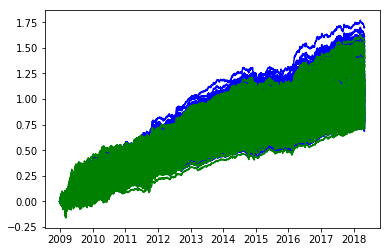

In [6]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b')
plt.plot(run2.returns.dropna().cumsum(), 'g')
plt.show()

In [30]:
# Create combo search
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:47<00:00, 11.32s/it]


In [7]:
# Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:56<00:00, 11.72s/it]


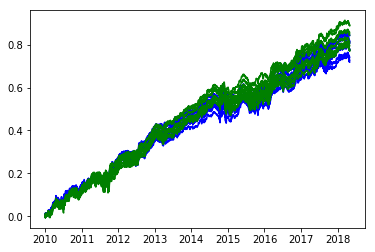

In [32]:
plt.figure()
plt.plot(comb1.best_results_returns.dropna().cumsum(), 'b')
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'g')
plt.show()

In [7]:
rollup_returns(comb2.best_results_returns)

Qtr,1,2,3,4
Year,,,,
2009,0.000000,0.000000,0.000000,0.000000
2010,0.042225,-0.003466,0.077135,0.001218
2011,0.037266,0.020774,-0.034883,0.089329
2012,0.022508,0.003650,0.039666,0.076446
2013,-0.005266,0.028518,0.037211,0.029033
2014,0.035789,0.034875,0.014124,-0.016184
2015,-0.003376,0.049363,-0.045502,0.045500
2016,0.041626,-0.005572,0.018567,0.048037
2017,0.023225,0.049593,-0.011990,0.033029


In [8]:
comb2.best_results_returns.to_csv('output.csv')

In [9]:
%pwd

u'/home/mitch/projects/ram/research/statarb'